### Cleaning Highschool Survey Data



In [2]:
import pandas as pd

RespRate = pd.read_excel("2016 NYC School Survey Public Data.xlsx",sheetname = 0)
#ParentPctBinary = pd.read_excel("2016 NYC School Survey Public Data.xlsx",sheetname = 7,header = [0,1])
##ParentNumBinary = pd.read_excel("2016 NYC School Survey Public Data.xlsx",sheetname = 8,header = [0,1])
#StudentPctBinary = pd.read_excel("2016 NYC School Survey Public Data.xlsx",sheetname = 11,header = [0,1])
#StudentNumBinary = pd.read_excel("2016 NYC School Survey Public Data.xlsx",sheetname = 12,header = [0,1])



In [8]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cmap = ListedColormap(["#e41a1c","#984ea3","#a65628","#377eb8","#ffff33","#4daf4a","#ff7f00"])

 
# High Schools At a Glance - Data import
schools = pd.read_csv('HSAAG_data/HSAAG_Schools.csv', encoding='latin-1',header=0)
schools.columns = ['rmv','School Name', 'DBN','Borough','Number of Programs','rmv2','rmv3', 'Neighborhood',
                   'Graduation Rate','Attendance Rate', '% students who feel safe','AP Courses y/n',
                   'rmv7', 'CTE y/n','rmv4', 'rmv5', 'rmv6']
school_cols = ['DBN', 'Borough', 'Number of Programs','Neighborhood', 'Graduation Rate', 
               'Attendance Rate','% students who feel safe', 'AP Courses y/n','CTE y/n']

schoolsDF = schools[school_cols]

# Change 'Graduation Rate', 'Attendance Rate', and '% students who feel safe' to decimals

schoolsDF['Graduation Rate'] = schoolsDF['Graduation Rate'].str.replace('%','').astype(float).apply(lambda x: x/100);
schoolsDF['Attendance Rate'] = schoolsDF['Attendance Rate'].str.replace('%','').astype(float).apply(lambda x: x/100);
schoolsDF['% students who feel safe'] = schoolsDF['% students who feel safe'].str.replace('%','').astype(float).apply(lambda x: x/100);

# Change Yes to 1. NaNs in this dataset correspond to 'No', so set NaNs to 0
# Index to DBN for easy comparison and merging of dataframes
schoolsDF = schoolsDF.fillna(0).replace('Yes',1).set_index('DBN')

#DBNs = schoolsDF
schoolsN = schoolsDF.join(RespRate.set_index('DBN'),how = 'inner')
schoolsN.columns.tolist()

/Users/karajohnson/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/karajohnson/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/karajohnson/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

['Borough',
 'Number of Programs',
 'Neighborhood',
 'Graduation Rate',
 'Attendance Rate',
 '% students who feel safe',
 'AP Courses y/n',
 'CTE y/n',
 'School Name',
 'Total Parent \nResponse Rate',
 'Total Teacher Response Rate',
 'Total Student Response Rate',
 'Percent Satisfaction: Collaborative Teachers',
 'Percent Satisfaction: Effective School Leadership',
 'Percent Satisfaction: Rigorous Instruction',
 'Percent Satisfaction: Strong Family-Community Ties',
 'Percent Satisfaction: Supportive Environment',
 'Percent Satisfaction: Trust',
 'Percent Satisfaction: Parent',
 'Percent Satisfaction: Student',
 'Percent Satisfaction: Teacher']

### Exploratory Data Analysis

#### 1. Correlation Matrix of Dataframe Columns

                                                    Number of Programs  \
Number of Programs                                            1.000000   
Graduation Rate                                               0.104687   
Attendance Rate                                               0.018476   
% students who feel safe                                     -0.158478   
Total Parent \nResponse Rate                                 -0.167997   
Percent Satisfaction: Strong Family-Community Ties           -0.210615   
Percent Satisfaction: Trust                                  -0.146249   
Percent Satisfaction: Student                                -0.179234   

                                                    Graduation Rate  \
Number of Programs                                         0.104687   
Graduation Rate                                            1.000000   
Attendance Rate                                            0.388747   
% students who feel safe                         

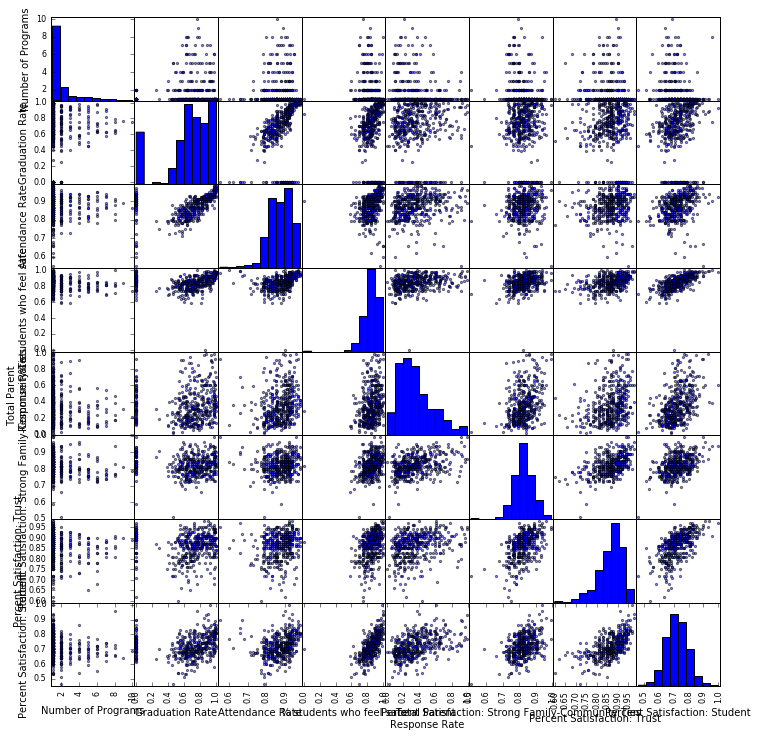

In [4]:
#cols2 = ['Number of Programs','Graduation Rate','Attendance Rate','% students who feel safe','Total Parent Response Rate','Percent Satisfaction: Strong Family-Community Ties','Percent Satisfaction: Trust','Percent Satisfaction: Student']
cols3 = [1,3,4,5,9,15,17,19]
print(schoolsN[cols3].corr())
pd.scatter_matrix(schoolsN[cols3],figsize=(12, 12), diagonal='hist');

From the correlation and scatter matrices above, here are the most highly correlated variables (>0.30):

1. Percent Satisfaction: Student and % Students Who Feel Safe (0.625)
2. Percent Satisfaction: Trust and Percent Satisfaction: Student (0.605)
3. Percent Satisfaction: Strong Family-Community Ties and Percent Satisfaction: Trust (0.497)
4. Percent Satisfaction: Student and Total Parent Response Rate (0.468)
5. Percent Satisfaction: Strong Family-Community Ties and Percent Satisfaction: Student (0.438)
6. Graduation Rate and Attendance Rate (0.389)
7. Percent Satisfaction: Strong Family-Community Ties and Total Parent Response Rate (0.380)
8. Percent Satisfaction: Trust and % Students Who Feel Safe (0.348)
9. Percent Satisfaction: Strong Family-Community Ties and % Students Who Feel Safe (0.313)



#### 2. Descriptive Statistics

In [33]:
schoolsN[cols3].describe()

,Number of Programs,Graduation Rate,Attendance Rate,% students who feel safe,Total Parent Response Rate,Percent Satisfaction: Strong Family-Community Ties,Percent Satisfaction: Trust,Percent Satisfaction: Student
count,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000
mean,1.762557,0.656895,0.870822,0.842991,0.359338,0.823196,0.863744,0.720457
std,1.596124,0.291114,0.063280,0.090275,0.207963,0.059273,0.062255,0.075210
min,1.000000,0.000000,0.550000,0.000000,0.010000,0.510000,0.600000,0.460000
25%,1.000000,0.580000,0.830000,0.790000,0.200000,0.780000,0.830000,0.670000
50%,1.000000,0.720000,0.880000,0.850000,0.310000,0.820000,0.870000,0.720000
75%,2.000000,0.870000,0.920000,0.910000,0.470000,0.860000,0.910000,0.770000
max,10.000000,1.000000,0.980000,1.000000,0.990000,0.990000,0.980000,1.000000


The descriptive statistics above show that some of the variables have high standard deviations, such as Number of Programs, Graduation Rate, and Total Parent Response Rate. Additionally, the mean Percent Satisfaction for the three educational elements we're interested in range from 72.0-82.3% with relatively low standard deviations (0.059-0.075). However, the ranges of these percentages are fairly high (with both low minimums and high maximums) and show some promise for analysis of why some schools yielded such low percentages.


#### 3. Relationship of variables to borough/neighborhood

In [5]:
neigh = schoolsN.groupby(['Neighborhood'])
schoolnum = neigh.count()
schoolkeep = schoolnum[schoolnum['Borough'] > 3]
schoolkeep.shape
#borough = schoolsN.groupby(['Borough'])
#gradrate = borough.mean()
#gradrate
#bor = pd.Series(schoolsN['Borough'])
#neigh 
#bor

(47, 20)

#### 4. Preliminary clustering

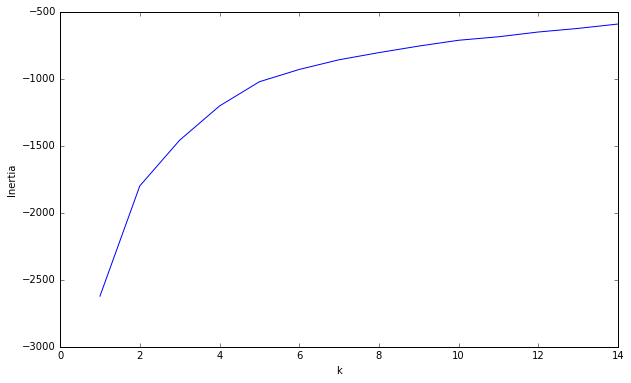

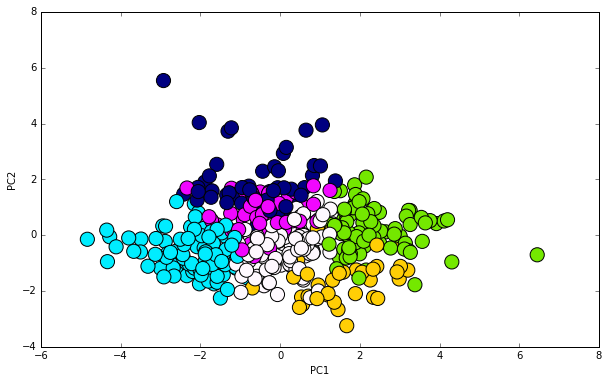

In [31]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA

# Scale the dataset, find PCA and transform coordinates
schoolsScaled = scale(schoolsN[cols3])

PCAmodel = PCA()
schoolsPCA = PCAmodel.fit_transform(schoolsScaled)

# create a new pandas dataframe 

PCAdf = pd.DataFrame(schoolsPCA, index=schoolsN.index,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])
PCAcols = ['PC1','PC2','PC3','PC4']
score = []
k = []

# clustering for k = 1 to k = 15
for i in range(1,15):
    model = KMeans(n_clusters=i)
    model.fit_predict(PCAdf[PCAcols])
    score.append(model.score(PCAdf[PCAcols]))
    k.append(i)

plt.plot(k, score)
plt.ylabel('Inertia')
plt.xlabel('k')
plt.show()

# k = 6
km_model = KMeans(n_clusters=6)
km_fit = km_model.fit_predict(PCAdf[PCAcols])

plt.scatter(PCAdf['PC1'],PCAdf['PC2'],c=km_fit,cmap='gist_ncar',s=200)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()